##### VeriSeti
 Yahoo Finance Uzerinden yfinance kutuphanesi kullanilarak amazon hissesi kullanilmistir 


#### 214210050 Furkan Demircan
#### 214210056 Eren Elagöz

In [1]:
# Kütüphaneler
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Tesla verilerini Yahoo Finance üzerinden çekelim
ticker = 'AMZN'
df = yf.download(ticker, start='2019-05-28', end='2024-05-26')


[*********************100%%**********************]  1 of 1 completed


In [3]:
# Veri setinin ilk 5 verisinin ekrana yazdirilmasi
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-28,91.637497,92.463501,91.367500,91.821503,91.821503,64000000
2019-05-29,91.155998,91.500000,90.376503,90.959503,90.959503,85580000
2019-05-30,91.274498,91.473503,90.391502,90.816002,90.816002,62938000
2019-05-31,89.500504,89.779503,88.635002,88.753502,88.753502,92376000
2019-06-03,88.000504,88.314499,83.599998,84.634499,84.634499,181974000


In [4]:
# Veri setinin son 5 verisinin ekrana yazdirilmasi
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-20,184.339996,186.669998,183.279999,183.539993,183.539993,30511800
2024-05-21,182.300003,183.259995,180.750000,183.149994,183.149994,50839100
2024-05-22,183.880005,185.220001,181.970001,183.130005,183.130005,28148800
2024-05-23,183.660004,184.759995,180.080002,181.050003,181.050003,33670200
2024-05-24,181.649994,182.440002,180.300003,180.750000,180.750000,27434100


In [5]:
# Veri setinin boyutuna bakilmasi
df.shape

(1259, 6)

In [6]:
# Veri setindeki benzersiz verilerin sayisinin gosterilmesi
df.nunique()

Open         1206
High         1223
Low          1226
Close        1232
Adj Close    1232
Volume       1252
dtype: int64

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,134.549548,136.180224,132.815422,134.514539,134.514539,7.155227e+07
std,31.249762,31.463199,30.953669,31.175360,31.175360,3.291122e+07
min,82.075500,83.480003,81.301498,81.820000,81.820000,1.762600e+07
25%,102.084751,103.520500,100.946503,102.305000,102.305000,5.020365e+07
50%,138.050003,139.330002,135.901993,137.850006,137.850006,6.272330e+07
75%,162.146500,164.005997,160.186501,161.964500,161.964500,8.424200e+07
max,189.160004,191.699997,187.440002,189.500000,189.500000,3.113460e+08


In [8]:
#verisetinin detaylarinin gosterilmesi
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-05-28 to 2024-05-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


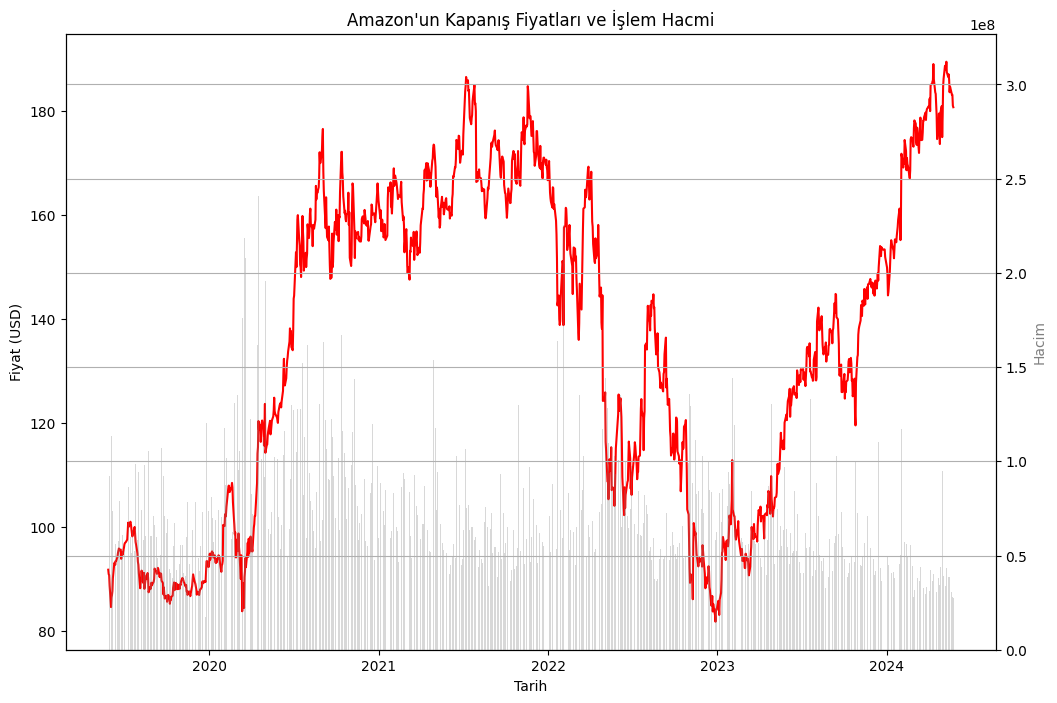

In [9]:
# 5 Mayis 2019dan gunumuze hisse fiyatinin kapanis degerleri ve islem hacmi tablosu


df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(df['Date'], df['Adj Close'], color='red')
ax1.set_xlabel('Tarih')
ax1.set_ylabel('Fiyat (USD)')

ax2 = ax1.twinx()
ax2.bar(df['Date'], df['Volume'], alpha=0.3, color='gray')
ax2.set_ylabel('Hacim', color='gray')

plt.title("Amazon'un Kapanış Fiyatları ve İşlem Hacmi")
plt.grid(True)
plt.show()

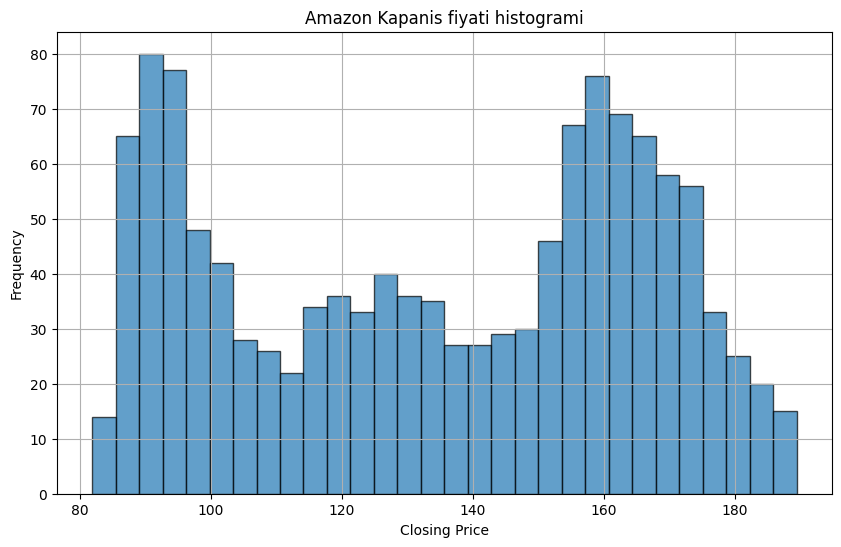

In [10]:
# Kapanış fiyatlarının histogramını çizme
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Amazon Kapanis fiyati histogrami')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

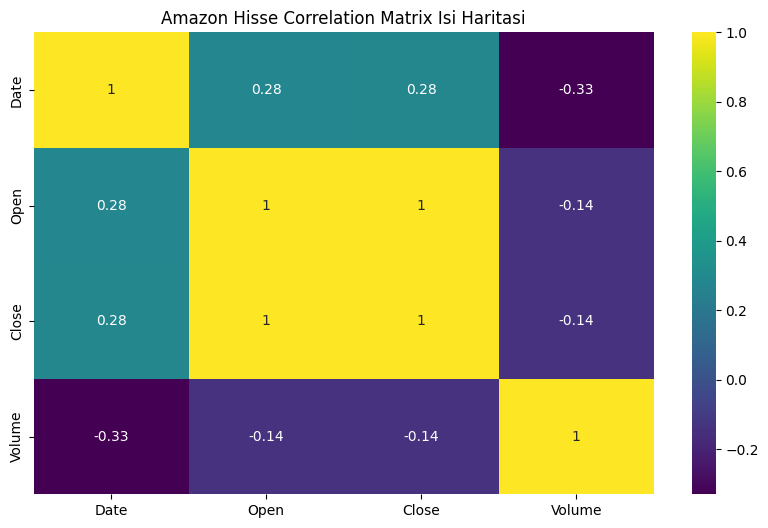

In [11]:
# Gerekli ve kullanilacak olan sutunlarin alinmasi
df.reset_index(inplace=True)  # 'Date' sütunu oluşturmak için index'i sıfırlıyoruz
df = df[['Date', 'Open', 'Close', 'Volume']]

# Korelasyon matrisini hesaplama
corr_matrix = df.corr()

# Isı haritasını çizme
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Amazon Hisse Correlation Matrix Isi Haritasi')
plt.show()

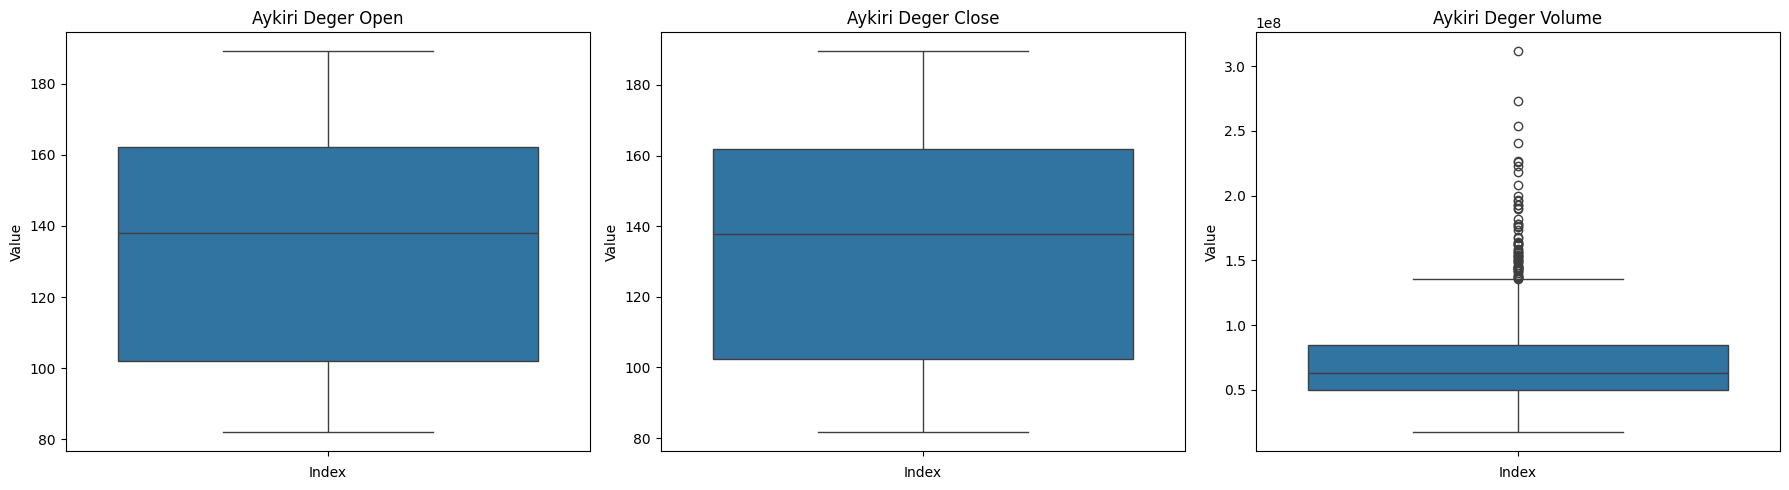

In [12]:
# Aykırı değerlerin görselleştirilmesi 
features = ['Open', 'Close', 'Volume']

#grafiklerin yan yana koyulmasi 
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(18, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, feature in enumerate(features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(f'Aykiri Deger {feature}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

#### veri hazirlama

In [13]:
# Bos degerlerin kontrol edilmesi
df.isnull().sum()


Date      0
Open      0
Close     0
Volume    0
dtype: int64

In [14]:
# Verileri hazırlama
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)

#Bagimsiz(X) ve Bagimli(y) degiskeni belirleme
X = df[['Open', 'Close', 'Volume']]
y = df['Close']

# Verileri normalize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\ErenElagz\AppData\Local\Temp\ipykernel_10160\2715252421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].map(pd.Timestamp.toordinal)


polinomal regresyon

In [15]:
# Polynomial degerlerin oluşturulmasi
degree = 2  # Polinom derecesi
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

In [16]:
# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=49)

# Test ve Egitim verilerinin boyutunu gorme 
x_train=X_train.T
x_test=X_test.T
y_train=y_train.T
y_test=y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (10, 1007)
x_test:  (10, 252)
y_train:  (1007,)
y_test:  (252,)


In [24]:
# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()


In [25]:
# Tahminleri yapma
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

[147.41999817 154.9980011  159.99749756 171.27600098 112.20999908
  93.51499939 157.2440033   89.61399841 126.27999878 172.54800415
 100.79000092 144.52000427 128.55999756 163.5269928  162.84649658
 126.55999756  93.23600006 154.64649963 161.33650208 144.3500061
 132.83000183 123.55200195 113.76000214 117.84750366 115.38400269
  97.70999908 119.31999969 115.70400238 158.82000732 106.74349976
 151.70649719 132.71000671 139.57000732 163.63549805 173.625
 150.0059967  173.56550598 127.33000183 133.75050354 151.66749573
 155.54100037 133.08999634  91.04299927 112.44000244 168.95449829
  93.33899689 170.80000305  90.81600189 169.09150696  96.54000092
 119.97250366 183.78700256  94.21499634 116.40699768 141.22999573
 125.92849731 161.25999451  86.01300049 180.38000488 167.1815033
 161.06300354 149.99299622 117.30999756  95.26999664 183.63000488
 188.         151.35800171 179.61999512 180.75        85.25
 157.84849548  91.17700195 130.1499939  106.22000122 130.80000305
 172.5        126.76999

In [19]:
# Eğitim ve test hatalarını hesaplama
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# R^2 skorları
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# MAPE  (Ortalama mutlak yüzde hatası)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100



print(f'MAPE: {mape}%')
print(f'Train MSE: {train_mse}, Train R^2: {train_r2:}')
print(f'Test MSE: {test_mse}, Test R^2: {test_r2}')

MAPE: 1.9898459639236047e-14%
Train MSE: 1.1312719739682644e-27, Train R^2: 1.0
Test MSE: 1.0193585487655893e-27, Test R^2: 1.0


In [20]:
# Son 1 ayın verilerini alalım
last_month_data = df[df['Date'] >= df['Date'].max() - 30]

# Son 1 ayın min ve max değerlerini alalım
open_min = last_month_data['Open'].min()
open_max = last_month_data['Open'].max()
close_min = last_month_data['Close'].min()
close_max = last_month_data['Close'].max()
volume_min = last_month_data['Volume'].min()
volume_max = last_month_data['Volume'].max()

In [21]:
future_dates = pd.date_range(start='2024-05-26', end='2024-06-03')
future_open_prices = np.random.uniform(low=open_min, high=open_max, size=len(future_dates))  # Son 1 ayın min ve max değerleri arasında rastgele açılış fiyatları
future_close_prices = np.random.uniform(low=close_min, high=close_max, size=len(future_dates))  # Son 1 ayın min ve max değerleri arasında rastgele kapanış fiyatları
future_volumes = np.random.uniform(low=volume_min, high=volume_max, size=len(future_dates))  # Son 1 ayın min ve max değerleri arasında rastgele hacimler


# Gelecek verileri hazırlama
future_data = pd.DataFrame({
    'Date': future_dates,
    'Open': future_open_prices,
    'Close': future_close_prices,
    'Volume': future_volumes
})

In [22]:
# Gelecek verileri normalize etme
X_future = future_data[['Open', 'Close', 'Volume']]
X_future_scaled = scaler.transform(X_future)

# Polynomial features kullanarak tahmin yapma
X_future_poly = poly_features.transform(X_future_scaled)  # Gelecek verileri normalize ederek polynomial features oluşturma
future_data['Predicted Close'] = model.predict(X_future_poly)

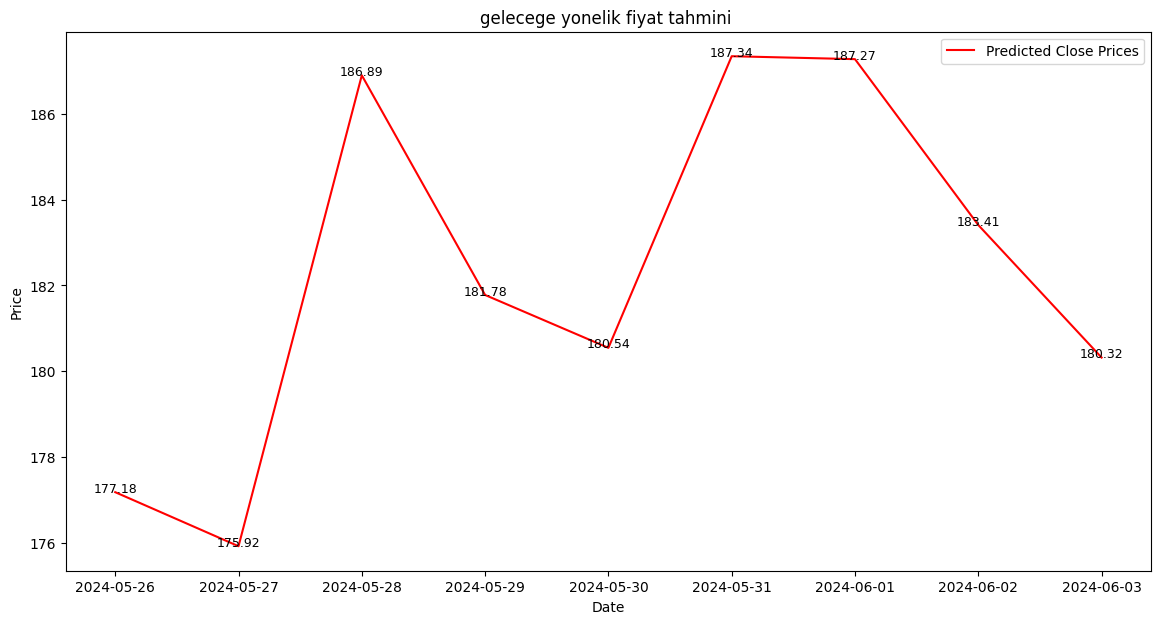

In [23]:
# Grafik olarak çizme
plt.figure(figsize=(14, 7))
plt.plot(future_data['Date'], future_data['Predicted Close'], label='Predicted Close Prices', linestyle='-', color='red')

# Her bir veri noktasının üzerine tahmin edilen fiyatları ekleme
for i in range(len(future_data)):
    plt.text(future_data['Date'].iloc[i], future_data['Predicted Close'].iloc[i], 
             f"{future_data['Predicted Close'].iloc[i]:.2f}", fontsize=9, ha='center')

 # Tahmin edilen verilerin tabloda gosterimi
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('gelecege yonelik fiyat tahmini ')
plt.legend()
plt.show()